In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

home = 'C:/Users/Ruben/Desktop/UOC/Master/Visualización de datos/PEC2/Fuentes Datos/'
data = pd.read_csv(home+"Expanded_data_with_more_features.csv")

In [3]:
parent_educ = data['ParentEduc'].dropna().unique()

In [4]:
df_filtered = data[data['ParentEduc'].isin(parent_educ)]
df_filtered

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


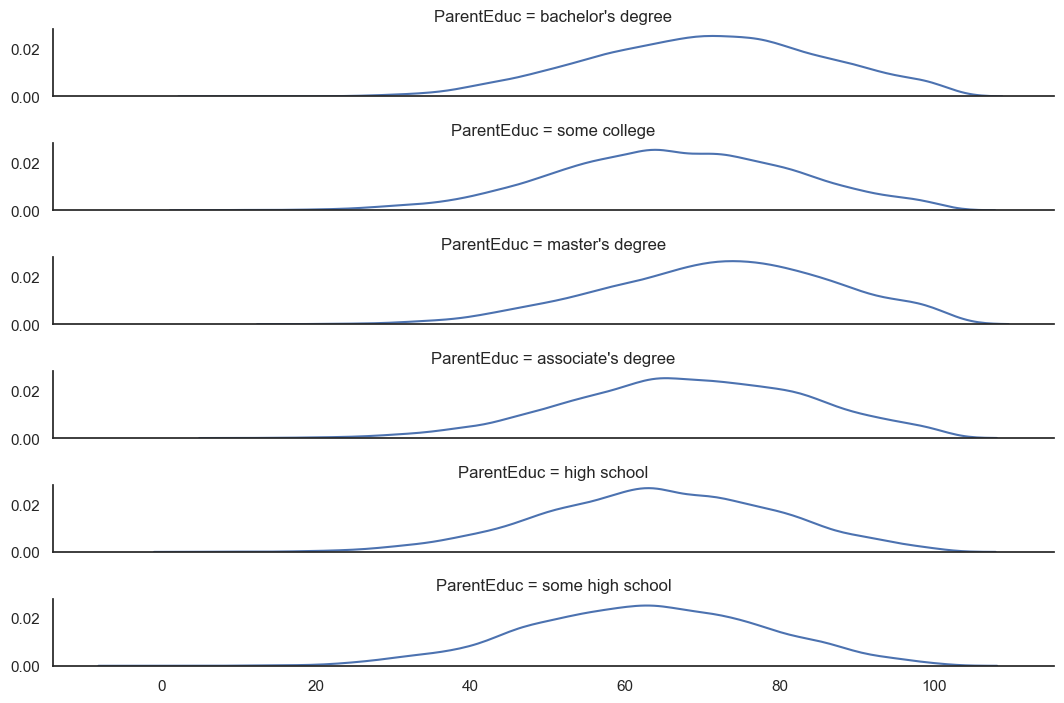

In [5]:
sns.set_theme(style="white")
g = sns.FacetGrid(df_filtered, row="ParentEduc", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="MathScore")

Text(0.5, 0.98, 'Notas en exámen de matemáticas según educación padres')

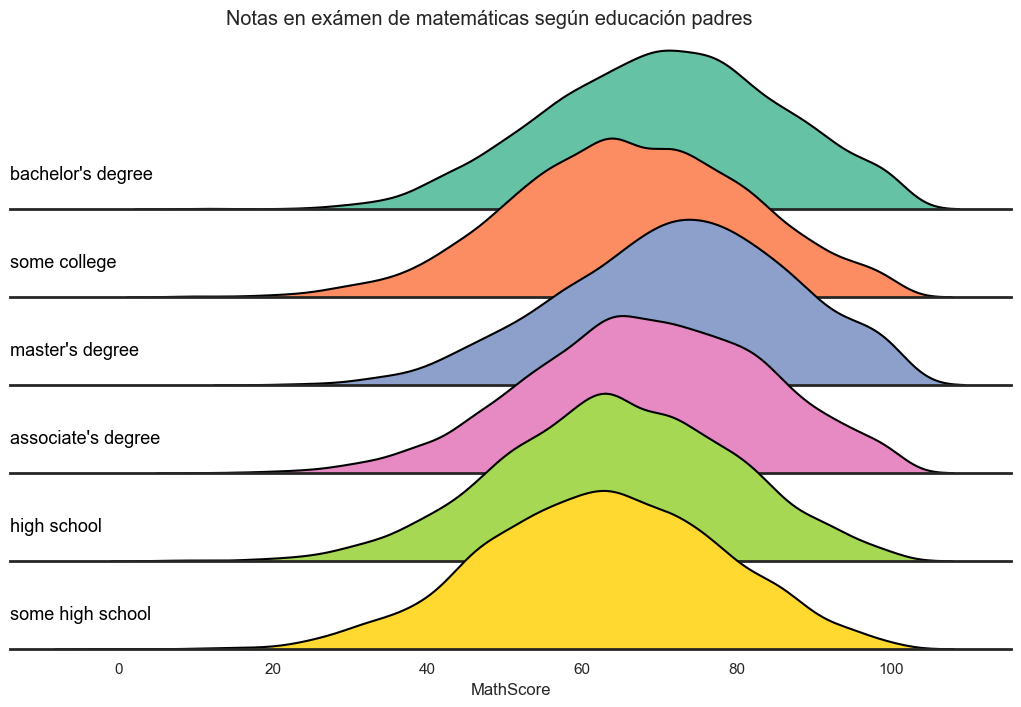

In [6]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(df_filtered, palette=palette, row="ParentEduc", hue="ParentEduc", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="MathScore", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="MathScore", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "ParentEduc")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="MathScore")
g.despine( left=True)
plt.suptitle('Notas en exámen de matemáticas según educación padres', y=0.98)